# Following below steps for case study 
-
1. Reading & Understaing & cleaning data 
2. Create Dummy variables 
2. Split into training, test 
3. fit & train the model
4. Residual analysis
5. Prediction & evalution on the test set 

-

In [101]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score


import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [102]:
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
bike_data.shape

(730, 16)

## Data Visualization

In [104]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [105]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Missing Value Analysis

In [106]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [107]:
# First we will remove instant variable because its an index column
bike_data.drop(['instant'],axis=1,inplace=True)

In [108]:
# from document we know cnt is the total of casual & registered 
# so we will remove casual & registed because cnt is our target variable 

bike_data.drop(['casual','registered'],axis = 1, inplace=True)

In [109]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [110]:
bike_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [111]:
bike_date_data = bike_data.loc[:,['yr','mnth','dteday']]
bike_date_data

,yr,mnth,dteday
0,0,1,01-01-2018
1,0,1,02-01-2018
2,0,1,03-01-2018
3,0,1,04-01-2018
4,0,1,05-01-2018
...,...,...,...
725,1,12,27-12-2019
726,1,12,28-12-2019
727,1,12,29-12-2019
728,1,12,30-12-2019


In [112]:
bike_data.yr.unique()

array([0, 1])

In [113]:
# Here we can also remove dteday column because it has no use for our analysis as we have already year and month maintained in dataset

bike_data.drop(['dteday'],axis=1,inplace=True)

In [114]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [115]:
print("Unique ",bike_data.season.unique())
print("yr ",bike_data.yr.unique())
print("mnth ",bike_data.mnth.unique())
print("holiday ",bike_data.holiday.unique())
print("weekday ",bike_data.weekday.unique())
print("workingday ",bike_data.workingday.unique())
print("weathersit ",bike_data.weathersit.unique())

Unique  [1 2 3 4]
yr  [0 1]
mnth  [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday  [0 1]
weekday  [6 0 1 2 3 4 5]
workingday  [0 1]
weathersit  [2 1 3]


# Here we will change non bool variable to object from the data sheet 
# Bool variables
#### workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#### yr : year (0: 2018, 1:2019)
#### workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

# Non Bool variables
#### season : season (1:spring, 2:summer, 3:fall, 4:winter)
#### mnth : month ( 1 to 12)
#### weekday : day of the week
#### weathersit : 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
####  temp : temperature in Celsius
#### atemp: feeling temperature in Celsius
#### hum: humidity
#### windspeed: wind speed
#### casual: count of casual users
#### registered: count of registered users
#### cnt: count of total rental bikes including both casual and registered

In [116]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### From data we can see that: season,mnth,weekday,workingday,weathersit all are categorical variables
### We will replace season,weekday and weathersit with appropriate values from the document sheet

In [117]:
bike_data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


In [118]:
def convert_month(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [119]:
columns_to_change = ['mnth']

bike_data[columns_to_change] = bike_data[columns_to_change].apply(convert_month)

In [120]:
columns_to_change = ['season']

bike_data[columns_to_change] = bike_data[columns_to_change].apply(lambda x: x.map({1:'spring', 
                                                                                   2:'summer', 
                                                                                   3:'fall', 
                                                                                   4:'winter'}))




In [121]:
columns_to_change = ['weathersit']

bike_data[columns_to_change] = bike_data[columns_to_change].apply(lambda x: x.map({1:'Clear_Few_clouds_Partly_cloudy',
                                                                                   2:'Mist_Cloudy_Broken_Few_clouds',
                                                                                   3:'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
                                                                                   4:'Heavy_Rain_IcePallets_Thunderstorm_Mist_Snow_Fog'}))


In [122]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy_Broken_Few_clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy_Broken_Few_clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Few_clouds_Partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few_clouds_Partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few_clouds_Partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [123]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Bi-Variate analysis

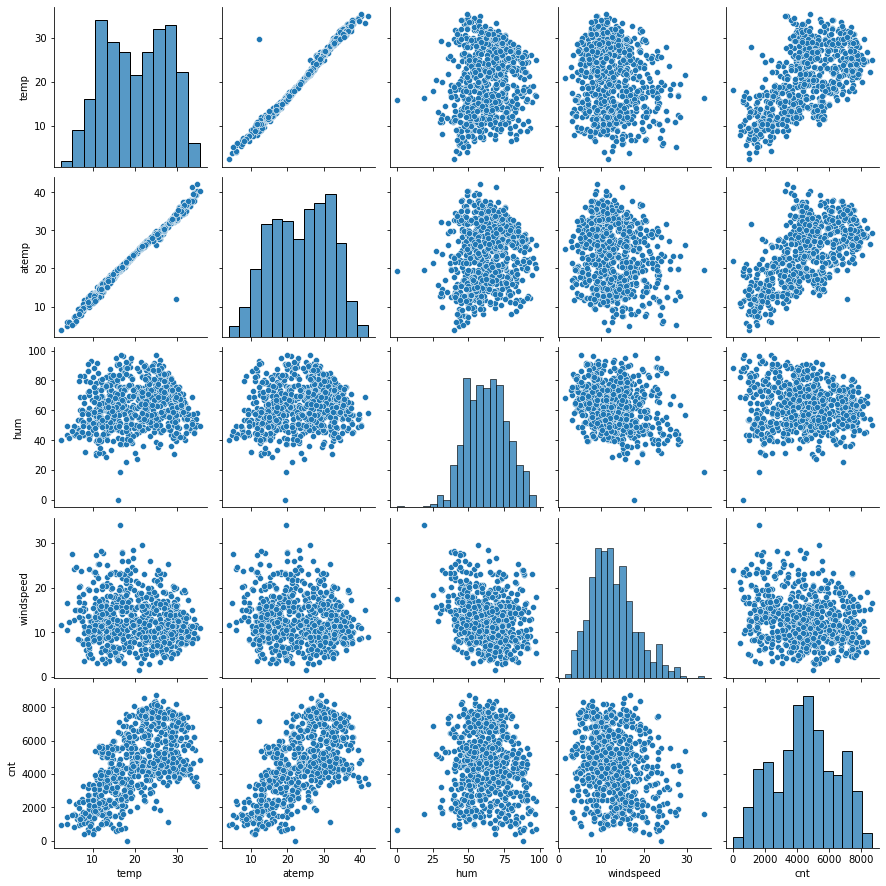

In [124]:
# Create pairplot with all numerical data type 

sns.pairplot(bike_data[['temp','atemp','hum','windspeed','cnt']])

# Insights:

Here we can observe there are high corelation between temp & atemp with cnt 

<AxesSubplot:>

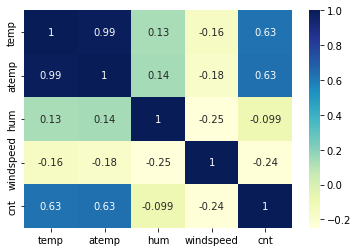

In [125]:
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu')

In [126]:
# In the above heat map we can see there are veri high approx 1 co-relation between temp & atemp 
# So we can remove one of them because its a case of multicollinearity

# Removing atemp

bike_data.drop('temp',axis = 1 , inplace = True)

# Univariate Analysis

<AxesSubplot:xlabel='workingday', ylabel='count'>

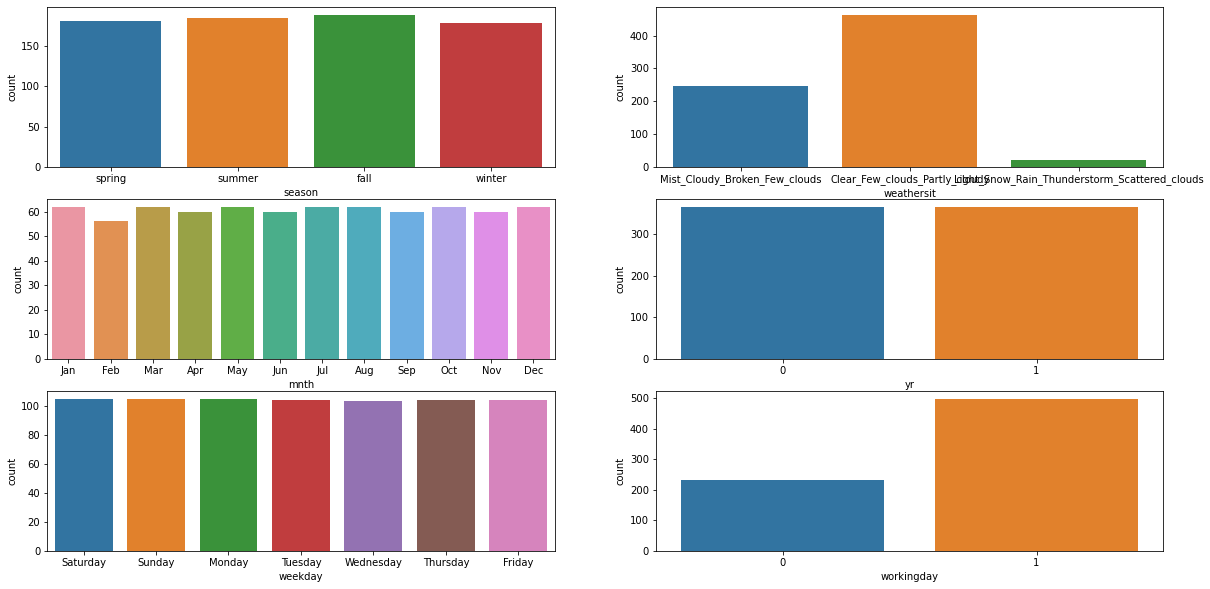

In [127]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.countplot(x = bike_data.season)
plt.subplot(3,2,2)
sns.countplot(x = bike_data.weathersit)
plt.subplot(3,2,3)
sns.countplot(x = bike_data.mnth)
plt.subplot(3,2,4)
sns.countplot(x = bike_data.yr)
plt.subplot(3,2,5)
sns.countplot(x = bike_data.weekday)
plt.subplot(3,2,6)
sns.countplot(x = bike_data.workingday)

# Insights

-
1. Season :- We can observe business was operating similar days in all four seasons.
2. Mnth :- We can observe business was operating similar days in months.
3. Weekday :- We can observe business was operating similar days in every weekday.
4. Weathersit :- We can observe there is no any data for 4th(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
    weather so we can assume company was not working on that season and in 2nd weather (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
    there was approx half demand and in third weather company was operating very less days (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).
5. Workingday :- Business was operating more in business day comparison to non working day (holiday).
6.    

-


In [128]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy_Broken_Few_clouds,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy_Broken_Few_clouds,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Few_clouds_Partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few_clouds_Partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few_clouds_Partly_cloudy,11.46350,43.6957,12.522300,1600


In [129]:
bike_data.select_dtypes([object]).columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [130]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Visualising Categorial variables 
## Outlier Analysis
### Here we can see there are some categorical variables . Lets make & check box plot for this

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

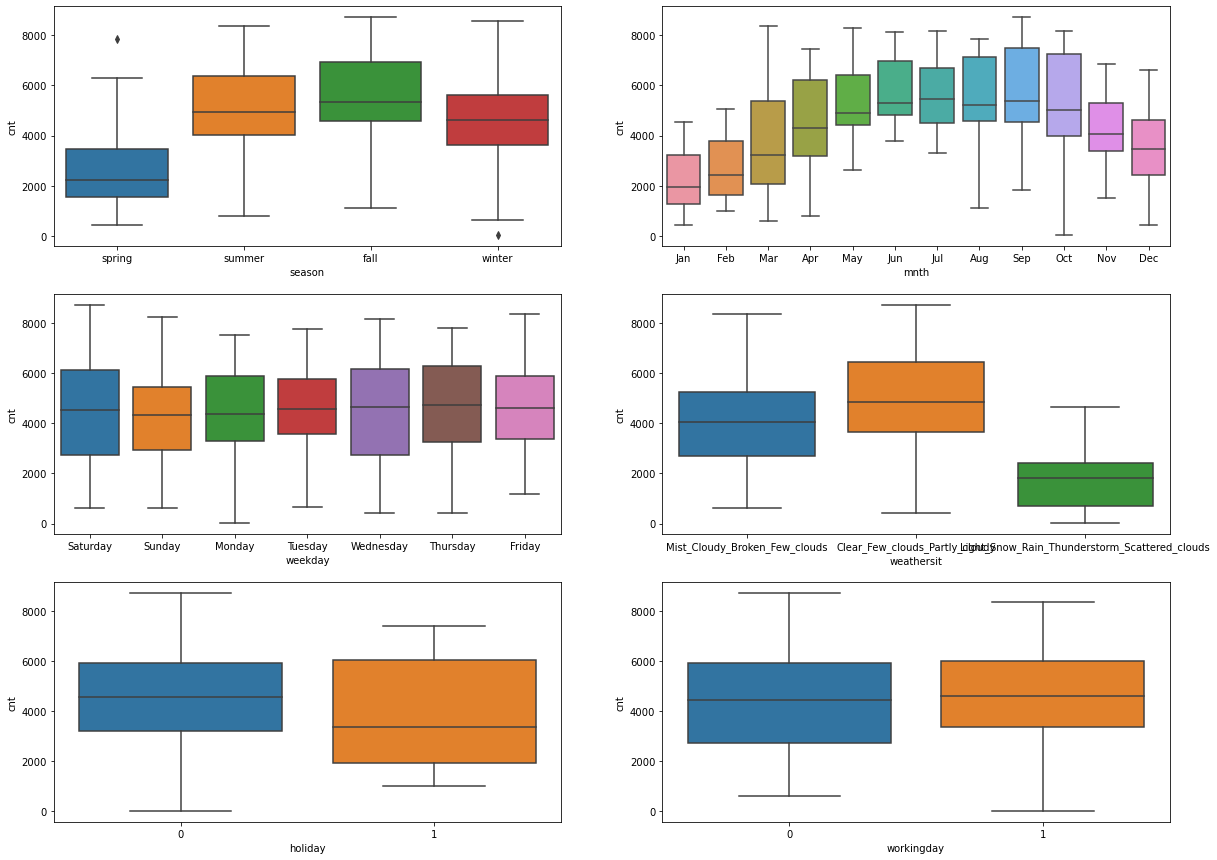

In [131]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.boxplot(x = 'season',y='cnt',data=bike_data)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth',y='cnt',data=bike_data)
plt.subplot(3,2,3)
sns.boxplot(x = 'weekday',y='cnt',data=bike_data)
plt.subplot(3,2,4)
sns.boxplot(x = 'weathersit',y='cnt',data=bike_data)
plt.subplot(3,2,5)
sns.boxplot(x = 'holiday',y='cnt',data=bike_data)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday',y='cnt',data=bike_data)

# Insights:

-
1. How demand is incresing according season summer and fall (High Business Demand) , winter (Medium Business Demand) , spring (Low Business Demand)
2. Year wise Aug, Sep, Oct (High Business Demand) , April to July (Medium Business Demand) , Jan to March & Nov, dec ( Low Business Demand) 
3. Day wise there are not much effice approx all day have same median value 
4. Weather wise Clear, Few clouds, Partly cloudy, Partly cloudy (High Business demand) ,  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Medium Business demand) , Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Low Business demand)
5. The working day box plots indicate if day is neither weekend nor holiday more bikes are rent.
- 

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

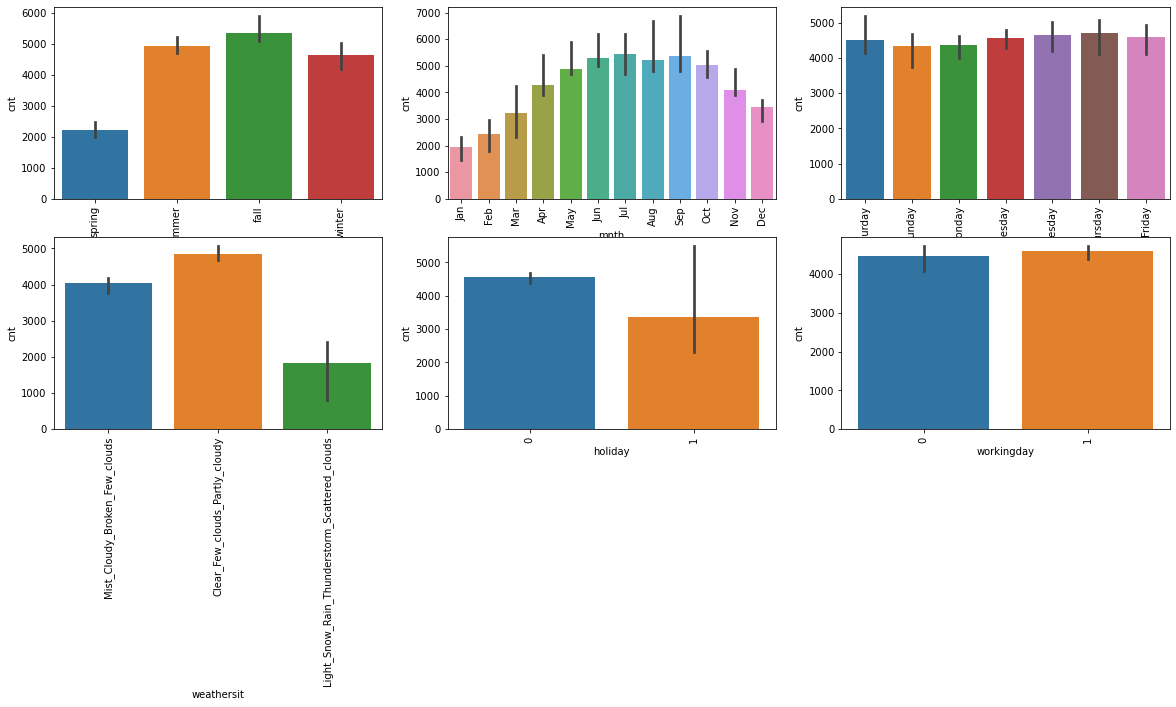

In [132]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
plt.xticks(rotation=90)
# Plotting the pie chart for above dataframe
sns.barplot(x=bike_data['season'],y=bike_data['cnt'],estimator=np.median)
plt.subplot(3,3,2)
plt.xticks(rotation=90)
sns.barplot(x=bike_data['mnth'],y=bike_data['cnt'],estimator=np.median)
plt.subplot(3,3,3)
plt.xticks(rotation=90)
sns.barplot(x=bike_data['weekday'],y=bike_data['cnt'],estimator=np.median)
plt.subplot(3,3,4)
plt.xticks(rotation=90)
sns.barplot(x=bike_data['weathersit'],y=bike_data['cnt'],estimator=np.median)
plt.subplot(3,3,5)
plt.xticks(rotation=90)
sns.barplot(x=bike_data['holiday'],y=bike_data['cnt'],estimator=np.median)
plt.subplot(3,3,6)
plt.xticks(rotation=90)
sns.barplot(x=bike_data['workingday'],y=bike_data['cnt'],estimator=np.median)

# Insights

-
1. As per wweathersit graph low demand in Light_Snow_Rain_Thunderstorm_Scattered_clouds weather
-

## Correlation Analysis

<AxesSubplot:>

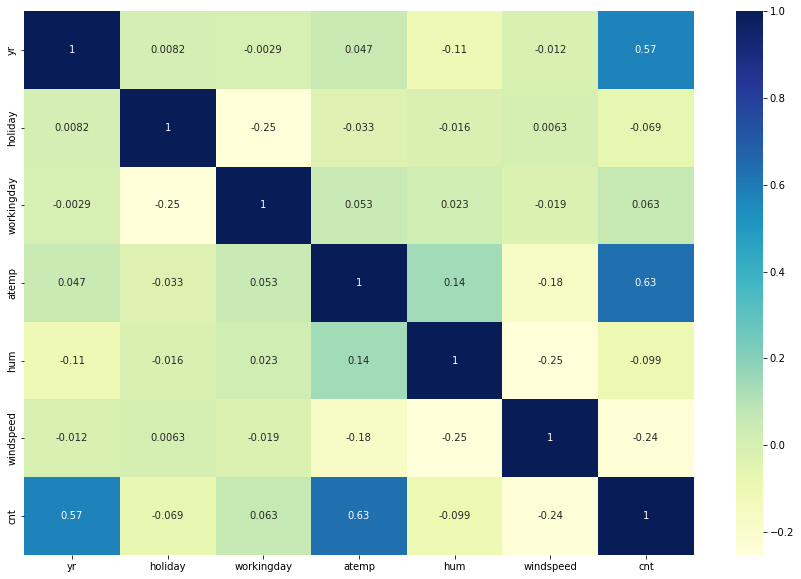

In [133]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_data.corr(),annot=True,cmap='YlGnBu')

In [134]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy_Broken_Few_clouds,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy_Broken_Few_clouds,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Few_clouds_Partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few_clouds_Partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few_clouds_Partly_cloudy,11.46350,43.6957,12.522300,1600


## Read one hot encoding & Labelling 

In [135]:
# Create dummy variables for categorical 
season_dummy = pd.get_dummies(bike_data.season,drop_first=True)
print(season_dummy)

     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]


In [136]:

mnth_dummy = pd.get_dummies(bike_data.mnth,drop_first=True)
print(mnth_dummy)
weekday_dummy = pd.get_dummies(bike_data.weekday,drop_first=True)
print(weekday_dummy)
weathersit_dummy = pd.get_dummies(bike_data.weathersit,drop_first=True)
print(weathersit_dummy)

     Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0      0    0    0    1    0    0    0    0    0    0    0
1      0    0    0    1    0    0    0    0    0    0    0
2      0    0    0    1    0    0    0    0    0    0    0
3      0    0    0    1    0    0    0    0    0    0    0
4      0    0    0    1    0    0    0    0    0    0    0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
725    0    1    0    0    0    0    0    0    0    0    0
726    0    1    0    0    0    0    0    0    0    0    0
727    0    1    0    0    0    0    0    0    0    0    0
728    0    1    0    0    0    0    0    0    0    0    0
729    0    1    0    0    0    0    0    0    0    0    0

[730 rows x 11 columns]
     Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0         0         1       0         0        0          0
1         0         0       1         0        0          0
2         1         0       0         0        0          0
3         0         0      

In [137]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy_Broken_Few_clouds,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy_Broken_Few_clouds,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Few_clouds_Partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few_clouds_Partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few_clouds_Partly_cloudy,11.46350,43.6957,12.522300,1600


In [138]:
print(season_dummy)
bike_data = pd.concat([bike_data,season_dummy],axis = 1)

     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]


In [139]:
bike_data = pd.concat([bike_data,mnth_dummy],axis = 1)

In [140]:
bike_data = pd.concat([bike_data,weekday_dummy],axis = 1)

In [141]:
bike_data = pd.concat([bike_data,weathersit_dummy],axis = 1)

In [142]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy_Broken_Few_clouds,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy_Broken_Few_clouds,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear_Few_clouds_Partly_cloudy,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear_Few_clouds_Partly_cloudy,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear_Few_clouds_Partly_cloudy,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [143]:
# Now we will delete actual categorial columns 
bike_data.drop(['season'],axis=1,inplace=True)

In [144]:
bike_data.drop(['mnth'],axis=1,inplace=True)

In [145]:
bike_data.drop(['weekday'],axis=1,inplace=True)

In [146]:
bike_data.drop(['weathersit'],axis=1,inplace=True)

In [147]:
bike_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Steps 

### Preparing the data for modelling (train-test split and rescalling etc)  

In [148]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   atemp                                          730 non-null    float64
 4   hum                                            730 non-null    float64
 5   windspeed                                      730 non-null    float64
 6   cnt                                            730 non-null    int64  
 7   spring                                         730 non-null    uint8  
 8   summer                                         730 non-null    uint8  
 9   winter                                         730 non

In [149]:
bike_data.shape

(730, 29)

In [150]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train,df_test = train_test_split(bike_data,train_size=0.7,random_state=10)

In [151]:
df_train.shape

(510, 29)

In [152]:
df_test.shape

(220, 29)

# Scalling 
-
Scaling of variables is an important step because, as you may have noticed, the variable ‘hum’ is on a different scale with respect to all other numerical variables, which take very small values. Also, the categorical variables that you encoded earlier take either 0 or 1 as their values. Hence, it is important to have everything on the same scale for the model to be easily interpretable.
-

In [153]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
72,0,0,1,16.60000,49.6957,9.174042,2046,1,0,0,...,0,0,1,0,0,0,0,0,0,0
510,1,0,0,32.13480,73.2500,13.332464,6536,0,1,0,...,0,0,0,1,0,0,0,0,0,0
700,1,0,0,17.96040,82.3333,8.333393,4649,0,0,1,...,0,0,0,0,1,0,0,0,0,1
264,0,0,1,27.74815,90.2083,8.584375,4795,0,0,0,...,0,1,0,0,0,1,0,0,0,1
577,1,0,1,33.36540,67.7500,9.458993,7580,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [154]:
scaler = MinMaxScaler()

In [155]:
# here we will scale every column which has numerical values not bool numerical (0,1)
df_train.columns


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')

In [156]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 72 to 265
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             510 non-null    int64  
 1   holiday                                        510 non-null    int64  
 2   workingday                                     510 non-null    int64  
 3   atemp                                          510 non-null    float64
 4   hum                                            510 non-null    float64
 5   windspeed                                      510 non-null    float64
 6   cnt                                            510 non-null    int64  
 7   spring                                         510 non-null    uint8  
 8   summer                                         510 non-null    uint8  
 9   winter                                         510 no

In [157]:
# for x in bike_data:
#     print(bike_data[x].isin([0,1]).all())
#     print(bike_data[x].columns())
    
bike_data_temp = bike_data.loc[:, (~bike_data.isin([0,1]).all())]
# bike_data_temp = bike_data.apply(lambda x: x.is([0,1]).all())
print(bike_data_temp.columns)
bike_data_temp.info()



Index(['atemp', 'hum', 'windspeed', 'cnt'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   atemp      730 non-null    float64
 1   hum        730 non-null    float64
 2   windspeed  730 non-null    float64
 3   cnt        730 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 22.9 KB


In [158]:
# As we can see there are four columns which have non bool varaible that means they have values also other than (0,1)

non_bool_columns = ['atemp','hum','windspeed','cnt']
df_train[non_bool_columns] = scaler.fit_transform(df_train[non_bool_columns])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
72,0,0,1,0.311594,0.393891,0.236118,0.194978,1,0,0,...,0,0,1,0,0,0,0,0,0,0
510,1,0,0,0.731886,0.694105,0.364071,0.737052,0,1,0,...,0,0,0,1,0,0,0,0,0,0
700,1,0,0,0.348399,0.809877,0.210252,0.509236,0,0,1,...,0,0,0,0,1,0,0,0,0,1
264,0,0,1,0.613206,0.910249,0.217975,0.526862,0,0,0,...,0,1,0,0,0,1,0,0,0,1
577,1,0,1,0.765180,0.624004,0.244886,0.863093,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [159]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.033333,0.690196,0.498021,0.563841,0.342904,0.492000,0.247059,0.256863,0.260784,...,0.084314,0.092157,0.147059,0.147059,0.129412,0.137255,0.149020,0.152941,0.033333,0.345098
std,0.500429,0.179682,0.462867,0.213764,0.183851,0.162760,0.236196,0.431725,0.437332,0.439494,...,0.278131,0.289531,0.354512,0.354512,0.335985,0.344454,0.356457,0.360284,0.179682,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.319432,0.426048,0.225964,0.325456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.504690,0.562400,0.322431,0.490945,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.672738,0.697621,0.434281,0.675812,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
df_train.shape

(510, 29)

In [161]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
72,0,0,1,0.311594,0.393891,0.236118,0.194978,1,0,0,...,0,0,1,0,0,0,0,0,0,0
510,1,0,0,0.731886,0.694105,0.364071,0.737052,0,1,0,...,0,0,0,1,0,0,0,0,0,0
700,1,0,0,0.348399,0.809877,0.210252,0.509236,0,0,1,...,0,0,0,0,1,0,0,0,0,1
264,0,0,1,0.613206,0.910249,0.217975,0.526862,0,0,0,...,0,1,0,0,0,1,0,0,0,1
577,1,0,1,0.765180,0.624004,0.244886,0.863093,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [162]:
# Now as we can see here all max values is 1 and min values is 0 

In [163]:
# Now check corelation between variables for training data set

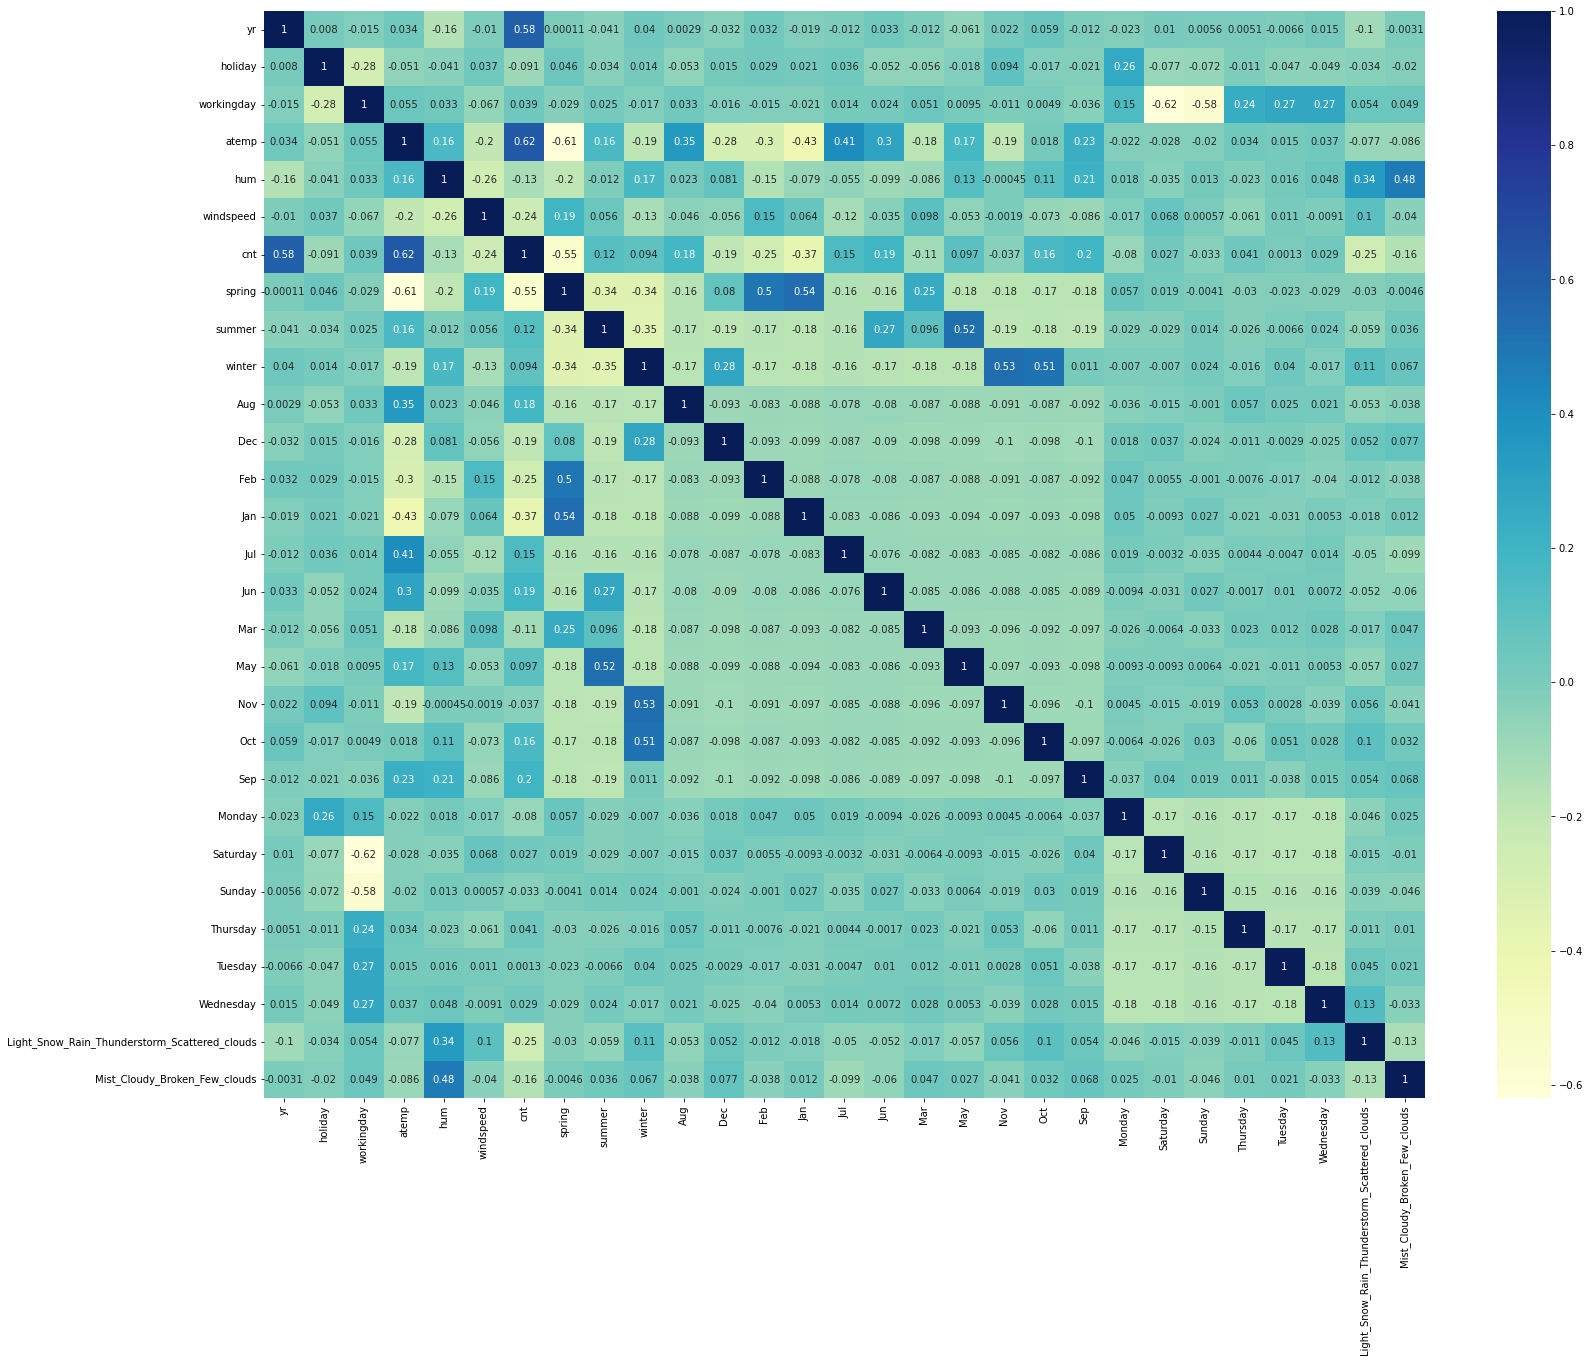

In [164]:
plt.figure(figsize=(26,20))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [165]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')

# Training the model now 


### Divide the model into X & y data set for Training

In [166]:
y_train = df_train.pop('cnt')
X_train = df_train

In [167]:
X_train.shape

(510, 28)

In [168]:
y_train.shape

(510,)

## Building our model

This time, we are using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [169]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [170]:
rfe = RFE(lm,step = 15)
rfe_model = rfe.fit(X_train,y_train)

In [171]:
# ?RFE

In [172]:
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 2),
 ('Sunday', False, 2),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Light_Snow_Rain_Thunderstorm_Scattered_clouds', True, 1),
 ('Mist_Cloudy_Broken_Few_clouds', True, 1)]

In [173]:
rfe_model_support_col = X_train.columns[rfe_model.support_]
rfe_model_support_col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jan', 'Jul', 'Nov', 'Sep',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')

In [174]:
rfe_model_not_support_col = X_train.columns[~rfe_model.support_]
rfe_model_not_support_col

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [175]:
X_train_rfe = X_train[rfe_model_support_col]
print(X_train_rfe.columns)
print(X_train_rfe.shape)

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jan', 'Jul', 'Nov', 'Sep',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')
(510, 14)


In [176]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
print(X_train_rfe_sm.shape)

(510, 15)


In [177]:
# Create the model 
lr = sm.OLS(y_train,X_train_rfe_sm)

In [178]:
# Fit the model 
lr_model = lr.fit()

In [179]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.98e-191
Time:                        23:05:23   Log-Likelihood:                 490.45
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     495   BIC:                            -887.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3389      0.029     11.528      0.000       0.281       0.397
yr                                                0.2474      0.009     28.874      0.000       0.231       0.264
holiday                                          -0.0782      0.023     -3.344      0.001      -0.124      -0.032
atemp                                             0.4623      0.036     12.865      0.000       0.392       0.533
hum                                              -0.1659      0.034     -4.891      0.000      -0.232      -0.099
windspeed                                        -0.1661      0.028     -5.872      0.000      -0.222      -0.111
spring                                           -0.1239      0.016     -7.749      0.000      -0.155      -0.093
winter                                            0.0820      0.014      5.843      0.000       0.054       0.110
Dec                                              -0.0595      0.017     -3.475      0.001      -0.093      -0.026
Jan                                              -0.0465      0.019     -2.507      0.012      -0.083      -0.010
Jul                                              -0.0693      0.019     -3.662      0.000      -0.106      -0.032
Nov                                              -0.0761      0.019     -3.990      0.000      -0.114      -0.039
Sep                                               0.0536      0.015      3.480      0.001       0.023       0.084
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.1949      0.028     -6.925      0.000      -0.250      -0.140
Mist_Cloudy_Broken_Few_clouds                    -0.0511      0.011     -4.500      0.000      -0.073      -0.029
==============================================================================
Omnibus:                       69.455   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.356
Skew:                          -0.681   Prob(JB):                     2.52e-40
Kurtosis:                       5.593   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now we have the all variables p value 
1. p Value ( It is zero for all variables means its good for prediction )
2. R-squared - Values is good for prediction 
3. Adj. R-squared: - Value is good for prediction 
4. F-statistics (High) & Prod-Fstatistics (low) is also good 

In [180]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,features,VIF
3,hum,17.98
2,atemp,14.02
4,windspeed,4.67
5,spring,2.82
6,winter,2.76
13,Mist_Cloudy_Broken_Few_clouds,2.52
0,yr,2.08
10,Nov,1.84
8,Jan,1.67
7,Dec,1.54


# Now we will check on below conditions & will add or remove variables from model 

-
1. High p value, High VIF (No grainer) , High p value means less significance (Drop this)
2. High Low case : 
    1. High p , Low VIF :  Remove these first
    2. Low p , High VIF :  Remove these after removed above
3. Both LOW ( We can keep it )




In [181]:
# First Step to remove High VIF value variable (Removing hum - VIF value is 24.10)
X_train_rfe = X_train_rfe.drop(['hum'],axis = 1)

In [182]:
X_train_rfe_sm6 = sm.add_constant(X_train_rfe)
lr_model6 = sm.OLS(y_train,X_train_rfe_sm6).fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.67e-187
Time:                        23:05:24   Log-Likelihood:                 478.41
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     496   BIC:                            -869.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2697      0.026     10.232      0.000       0.218       0.322
yr                                                0.2556      0.009     29.726      0.000       0.239       0.272
holiday                                          -0.0791      0.024     -3.303      0.001      -0.126      -0.032
atemp                                             0.4137      0.035     11.713      0.000       0.344       0.483
windspeed                                        -0.1242      0.028     -4.504      0.000      -0.178      -0.070
spring                                           -0.1287      0.016     -7.881      0.000      -0.161      -0.097
winter                                            0.0751      0.014      5.257      0.000       0.047       0.103
Dec                                              -0.0672      0.017     -3.854      0.000      -0.101      -0.033
Jan                                              -0.0542      0.019     -2.868      0.004      -0.091      -0.017
Jul                                              -0.0573      0.019     -2.986      0.003      -0.095      -0.020
Nov                                              -0.0802      0.019     -4.116      0.000      -0.118      -0.042
Sep                                               0.0458      0.016      2.924      0.004       0.015       0.077
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.2666      0.025    -10.854      0.000      -0.315      -0.218
Mist_Cloudy_Broken_Few_clouds                    -0.0849      0.009     -9.214      0.000      -0.103      -0.067
==============================================================================
Omnibus:                       74.199   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.495
Skew:                          -0.695   Prob(JB):                     2.65e-47
Kurtosis:                       5.857   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
vif = pd.DataFrame()
vif['feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,feature,VIF
2,atemp,4.90
3,windspeed,4.66
5,winter,2.55
4,spring,2.42
0,yr,2.05
9,Nov,1.80
7,Jan,1.61
12,Mist_Cloudy_Broken_Few_clouds,1.55
6,Dec,1.48
8,Jul,1.36


### Now we can use above model is all set becaue all VIF values are less than 5 and all P values is < 0.05. But we will try now with add some not rfe support values 

In [184]:
rfe_model_not_support_col

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [185]:
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 2),
 ('Sunday', False, 2),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Light_Snow_Rain_Thunderstorm_Scattered_clouds', True, 1),
 ('Mist_Cloudy_Broken_Few_clouds', True, 1)]

# For Ranking 1 we already checked the model now we will move to next big value from 1 in ranking

In [186]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,spring,winter,Dec,Jan,Jul,Nov,Sep,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds,workingday
72,0,0,0.311594,0.236118,1,0,0,0,0,0,0,0,0,1
510,1,0,0.731886,0.364071,0,0,0,0,0,0,0,0,0,0
700,1,0,0.348399,0.210252,0,1,1,0,0,0,0,0,1,0
264,0,0,0.613206,0.217975,0,0,0,0,0,0,1,0,1,1
577,1,0,0.765180,0.244886,0,0,0,0,0,0,0,0,0,1


In [187]:
X_train_rfe_sm7 = sm.add_constant(X_train_rfe)
lr_model7 = sm.OLS(y_train,X_train_rfe_sm7).fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.94e-186
Time:                        23:05:24   Log-Likelihood:                 478.97
No. Observations:                 510   AIC:                            -927.9
Df Residuals:                     495   BIC:                            -864.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2630      0.027      9.694      0.000       0.210       0.316
yr                                                0.2557      0.009     29.737      0.000       0.239       0.273
holiday                                          -0.0720      0.025     -2.895      0.004      -0.121      -0.023
atemp                                             0.4120      0.035     11.651      0.000       0.343       0.481
windspeed                                        -0.1224      0.028     -4.433      0.000      -0.177      -0.068
spring                                           -0.1290      0.016     -7.901      0.000      -0.161      -0.097
winter                                            0.0754      0.014      5.280      0.000       0.047       0.104
Dec                                              -0.0672      0.017     -3.856      0.000      -0.101      -0.033
Jan                                              -0.0542      0.019     -2.867      0.004      -0.091      -0.017
Jul                                              -0.0572      0.019     -2.979      0.003      -0.095      -0.019
Nov                                              -0.0809      0.019     -4.151      0.000      -0.119      -0.043
Sep                                               0.0468      0.016      2.983      0.003       0.016       0.078
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.2684      0.025    -10.901      0.000      -0.317      -0.220
Mist_Cloudy_Broken_Few_clouds                    -0.0855      0.009     -9.263      0.000      -0.104      -0.067
workingday                                        0.0100      0.010      1.035      0.301      -0.009       0.029
==============================================================================
Omnibus:                       72.150   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.338
Skew:                          -0.662   Prob(JB):                     6.39e-48
Kurtosis:                       5.911   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
vif = pd.DataFrame()
vif['feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,feature,VIF
2,atemp,6.20
3,windspeed,4.68
13,workingday,3.36
5,winter,2.57
4,spring,2.51
0,yr,2.05
9,Nov,1.82
7,Jan,1.61
12,Mist_Cloudy_Broken_Few_clouds,1.57
6,Dec,1.48


# Here we can see some details after adding 'workingday'
-
1. p value is high for workingday
2. R-adjusted and R-squared not increasing
3. VIF effect for other is high
-

In [189]:
# SO our decision to remove "workingday" is good . So we removed it 
X_train_rfe = X_train_rfe.drop(['workingday'],axis=1)

In [190]:
#ADDING SUMMER TO CHECK IF MODEL IMPROVES
X_train_rfe['summer']=X_train['summer']

In [191]:
X_train_rfe_sm8 = sm.add_constant(X_train_rfe)
lr_model8 = sm.OLS(y_train,X_train_rfe_sm8).fit()
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.94e-186
Time:                        23:05:24   Log-Likelihood:                 478.54
No. Observations:                 510   AIC:                            -927.1
Df Residuals:                     495   BIC:                            -863.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2598      0.033      7.842      0.000       0.195       0.325
yr                                                0.2557      0.009     29.708      0.000       0.239       0.273
holiday                                          -0.0794      0.024     -3.313      0.001      -0.126      -0.032
atemp                                             0.4209      0.038     11.022      0.000       0.346       0.496
windspeed                                        -0.1242      0.028     -4.500      0.000      -0.178      -0.070
spring                                           -0.1212      0.022     -5.455      0.000      -0.165      -0.078
winter                                            0.0806      0.018      4.448      0.000       0.045       0.116
Dec                                              -0.0656      0.018     -3.703      0.000      -0.100      -0.031
Jan                                              -0.0532      0.019     -2.791      0.005      -0.091      -0.016
Jul                                              -0.0532      0.021     -2.547      0.011      -0.094      -0.012
Nov                                              -0.0784      0.020     -3.951      0.000      -0.117      -0.039
Sep                                               0.0496      0.017      2.843      0.005       0.015       0.084
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.2662      0.025    -10.820      0.000      -0.315      -0.218
Mist_Cloudy_Broken_Few_clouds                    -0.0852      0.009     -9.220      0.000      -0.103      -0.067
summer                                            0.0081      0.016      0.496      0.620      -0.024       0.040
==============================================================================
Omnibus:                       73.817   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.782
Skew:                          -0.695   Prob(JB):                     1.70e-46
Kurtosis:                       5.826   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
vif = pd.DataFrame()
vif['feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,feature,VIF
2,atemp,5.72
3,windspeed,5.16
5,winter,3.03
4,spring,2.96
13,summer,2.42
0,yr,2.06
9,Nov,1.80
8,Jul,1.63
7,Jan,1.61
12,Mist_Cloudy_Broken_Few_clouds,1.60


# Here we can see some details after adding 'summer'
-
1. p value is high for summer
2. R-adjusted is decresing
3. R-square is not increasing
4. VIF is good for summer
So our decision to remove it is good
-

### So we are removing summer vairable in model 

In [193]:
# SO our decision to remove "summer" is good . So we removed it 
X_train_rfe = X_train_rfe.drop(['summer'],axis=1)

In [194]:
X_train_rfe.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'Dec', 'Jan',
       'Jul', 'Nov', 'Sep', 'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')

In [195]:
X_train_rfe_sm9 = sm.add_constant(X_train_rfe)
lr_model9 = sm.OLS(y_train,X_train_rfe_sm9).fit()
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.67e-187
Time:                        23:05:24   Log-Likelihood:                 478.41
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     496   BIC:                            -869.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2697      0.026     10.232      0.000       0.218       0.322
yr                                                0.2556      0.009     29.726      0.000       0.239       0.272
holiday                                          -0.0791      0.024     -3.303      0.001      -0.126      -0.032
atemp                                             0.4137      0.035     11.713      0.000       0.344       0.483
windspeed                                        -0.1242      0.028     -4.504      0.000      -0.178      -0.070
spring                                           -0.1287      0.016     -7.881      0.000      -0.161      -0.097
winter                                            0.0751      0.014      5.257      0.000       0.047       0.103
Dec                                              -0.0672      0.017     -3.854      0.000      -0.101      -0.033
Jan                                              -0.0542      0.019     -2.868      0.004      -0.091      -0.017
Jul                                              -0.0573      0.019     -2.986      0.003      -0.095      -0.020
Nov                                              -0.0802      0.019     -4.116      0.000      -0.118      -0.042
Sep                                               0.0458      0.016      2.924      0.004       0.015       0.077
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.2666      0.025    -10.854      0.000      -0.315      -0.218
Mist_Cloudy_Broken_Few_clouds                    -0.0849      0.009     -9.214      0.000      -0.103      -0.067
==============================================================================
Omnibus:                       74.199   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.495
Skew:                          -0.695   Prob(JB):                     2.65e-47
Kurtosis:                       5.857   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
vif = pd.DataFrame()
vif['feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,feature,VIF
2,atemp,4.90
3,windspeed,4.66
5,winter,2.55
4,spring,2.42
0,yr,2.05
9,Nov,1.80
7,Jan,1.61
12,Mist_Cloudy_Broken_Few_clouds,1.55
6,Dec,1.48
8,Jul,1.36


### So here we can see after remove this R-squared and Adjusted Rsquare is decresing so we won't remove it so that's our final variables 
- 
['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'Dec', 'Jan',
       'Jul', 'Nov', 'Sep', 'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds', 'Feb']
-

# Now we can see above model becaue all VIF values are less than 5 and all P values is < 0.05 (SO these variables are good model predictor )


Text(0.5, 0, 'Errors')

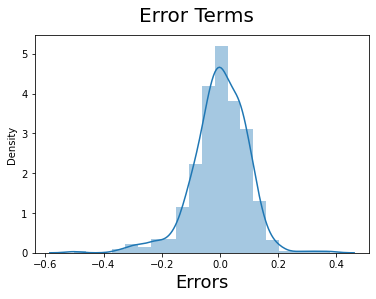

In [197]:
y_train_pred = lr_model9.predict(X_train_rfe_sm9)
res = y_train - y_train_pred

#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [198]:
df_test[non_bool_columns] = scaler.transform(df_test[non_bool_columns])

In [199]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.018182,0.668182,0.519172,0.552654,0.355062,0.492709,0.245455,0.240909,0.204545,...,0.086364,0.059091,0.136364,0.136364,0.177273,0.154545,0.127273,0.113636,0.018182,0.318182
std,0.500809,0.133913,0.471940,0.235235,0.175978,0.152994,0.228453,0.431338,0.428610,0.404289,...,0.281541,0.236333,0.343957,0.343957,0.382770,0.362295,0.334038,0.318093,0.133913,0.466833
min,0.000000,0.000000,0.000000,-0.030556,-0.239512,0.041051,-0.049378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.319360,0.420738,0.249687,0.338253,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.556351,0.556027,0.335269,0.509960,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.725880,0.679103,0.437533,0.653054,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.950477,0.969106,0.864144,0.933961,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
## Divide into X_test data & y_test data 
y_test = df_test.pop('cnt')
X_test = df_test

In [201]:
print(X_test.shape)
print(y_test.shape)

(220, 28)
(220,)


In [202]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(220, 29)

In [203]:
print(X_test.columns)
print(X_train_rfe.columns)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')
Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'Dec', 'Jan',
       'Jul', 'Nov', 'Sep', 'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')


In [204]:
X_test_sm = X_test_sm.drop(['workingday','hum','summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],axis = 1)
X_test_sm.shape

(220, 14)

In [205]:
y_test_pred = lr_model9.predict(X_test_sm)

In [206]:
print('Train Set R2-Score is : ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test Set R2-Score is : ' ,r2_score(y_test, y_test_pred))

r2_score_test =  r2_score(y_test, y_test_pred)
print('Train Set Adj-R-square is : ' ,lr_model9.rsquared_adj)  # R score for train data

N= len(X_test) 

final_variables = list(lr_model9.params.index)
final_variables.remove('const')
independent_var_count =len(final_variables) # Number of independent variables
# print(independent_var_count)
r2_test_adj = round((1-((1-r2_score_test)*(N-1)/(N-independent_var_count-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))


Train Set R2-Score is :  0.8389211983057802
Test Set R2-Score is :  0.8143482445411014
Train Set Adj-R-square is :  0.8346993748742785
Adj. R-Squared for Test dataset:  0.803


Text(0, 0.5, 'y_pred')

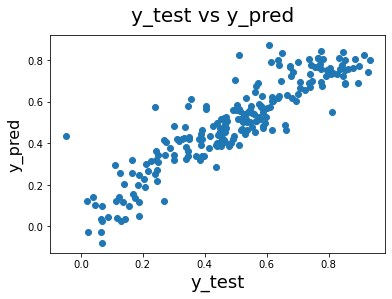

In [207]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

# Significant variables to predict the demand for shared bikes
-
1. holiday
2. atemp
3. windspeed
4. season(spring,winter)
5. year(Dec,Jan,Jul,Nov,Sep)
6. weathersit(Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds)
-

In [208]:
print("Coefficent for the variables are define here ")
print(round(lr_model9.params,3))

Coefficent for the variables are define here 
const                                            0.270
yr                                               0.256
holiday                                         -0.079
atemp                                            0.414
windspeed                                       -0.124
spring                                          -0.129
winter                                           0.075
Dec                                             -0.067
Jan                                             -0.054
Jul                                             -0.057
Nov                                             -0.080
Sep                                              0.046
Light_Snow_Rain_Thunderstorm_Scattered_clouds   -0.267
Mist_Cloudy_Broken_Few_clouds                   -0.085
dtype: float64


The equation of our best fitted line is:
cnt = 0.270 + (0.256*yr)-(0.079*holiday)+(0.414*atemp)-(0.124*windspeed)-(0.129*spring)+(0.075*winter)-(0.067*Dec)-(0.054*Jan)-(0.057*Jul)-(0.080*Nov)+(0.046+Sep)-(0.267*Light_Snow_Rain_Thunderstorm_Scattered_clouds)-(0.085*Mist_Cloudy_Broken_Few_clouds)

Coefficients of the variable will explain the factor effecting the bike demand. 

Train Set R2-Score is :  0.8389211983057802
Test Set R2-Score is :  0.8143482445411014
Train Set Adj-R-square is :  0.8346993748742785
Adj. R-Squared for Test dataset:  0.803

Here we can say R-squared and Adj R-squared value for both Training & Test dataset can explain more that 80% of bike demand. 

Top 3 features contributing towards explaining the demand of the shared bikes :- 
-
1. atemp (feeling temperature in Celsius) :- Positive Corelation
2. weathersit (Light_Snow_Rain_Thunderstorm_Scattered_clouds + Mist_Cloudy_Broken_Few_clouds) :- Negative Co-relation
3. yr (Year) :- Postive Corelation
-

# Thank You 